## 0 | Import packages

In [21]:
import os
import h5py
import numpy as np
import pandas as pd
import tkinter
import matplotlib.pyplot as plt
from utilities import importFile, openFile
from tkinter.filedialog import askopenfilename, askopenfilenames
from collections import defaultdict
from nptdms import TdmsFile
print("done!")

done!


## 1 | Open an .hdf5 file and extract channels

In [22]:
# Deprecated (function improved)
# voltage_mV, current_pA, command, ttl, extracted_channels, corrected_trial_keys, channel_list, channels_data_frame, time, dt, folder_name, file_name = importFile(curated_channel = 'Sweeps_Analysis')

channels_data_frame, time, dt, folder_name, file_name = importFile(curated_channel = 'Sweeps_Analysis')
print("file imported")

file imported


In [23]:
# print(voltage_mV) # deprecated
# print(command) # deprecated
channels_data_frame

,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
Channel A,"[-1.6124128324134814, -1.2260207615682315, -1....","[-1.5480141542486916, -1.4192167975478727, -1....","[-1.7412101883719264, -1.4836154759601623, -1....","[-1.5158148151198958, -1.5158148151198958, -1....","[-1.3870174582953112, -1.6124128324134814, -1....","[-1.258220100975559, -1.4514161367694889, -1.3...","[-1.3870174582953112, -1.5480141542486916, -1....","[-1.2260207615682315, -1.5480141542486916, -1....","[-1.5480141542486916, -1.5480141542486916, -1....","[-1.7412101883719264, -1.7412101883719264, -1....","[-2.1276022532796945, -1.870007543835665, -2.1...","[-1.4514161367694889, -1.5480141542486916, -1....","[-1.5480141542486916, -1.5480141542486916, -1....","[-1.6768115104545525, -1.5802134933465526, -1....","[-1.8056088661656235, -1.9666055601089187, -1....","[-2.0954029147073254, -1.9022068826243217, -1....","[-1.9022068826243217, -1.9022068826243217, -1....","[-1.9022068826243217, -1.934406221382072, -1.9..."
Channel B,"[-11.616220826606902, -7.752300066135383, -8.7...","[9.635343909020817, 5.771422947326991, 11.8892...","[0.29753499493087243, -0.6684452226398963, 1.9...","[-20.632035761040658, -17.734095272842332, -22...","[-11.938214221299425, -13.870174582953112, -14...","[-7.752300066135383, -8.718280260436195, -9.68...","[-4.532366064980151, -0.6684452226398963, -5.8...","[5.449429535875142, 6.737403183549116, -0.3464...","[-3.2443924558328088, -4.210372663158741, -0.9...","[8.669363664395322, 4.805442713904577, 0.61952...","[-24.817949755377462, -25.13994313739636, -29....","[-10.97223403629284, -17.734095272842332, -15....","[-10.00625384849881, -8.074293464545597, -10.0...","[6.093416359089918, 6.737403183549116, 6.09341...","[-2.922399052770176, -0.3464518170935623, -2.2...","[-12.58220100975559, -10.650240640671248, -12....","[-12.260207615682315, -11.294227431604716, -14...","[-3.2443924558328088, 0.619528401409027, -1.95..."
Output A,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
Output B,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


## 2 | Navigating a pandas dataframe

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.flags.html


In [24]:
# pandas.DataFrame.at
# Access a single value for a row/column label pair.
# Similar to loc, in that both provide label-based lookups. Use at if you only need to get or set a single value in a DataFrame or Series.
print(channels_data_frame.at['Channel A', '7'])

# same as pandas.DataFrame.iat
# Access a single value for a row/column pair by integer position.
# Similar to iloc, in that both provide integer-based lookups. Use iat if you only need to get or set a single value in a DataFrame or Series.
print(channels_data_frame.iat[0,0])

[-1.61241283 -1.22602076 -1.54801415 ... -1.51581482 -1.19382142
 -1.61241283]
[-1.61241283 -1.22602076 -1.54801415 ... -1.51581482 -1.19382142
 -1.61241283]


[-1.61241283 -1.22602076 -1.54801415 ... -1.51581482 -1.19382142
 -1.61241283]


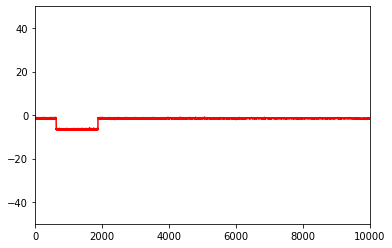

In [25]:
b = np.array(channels_data_frame.at['Channel A', '7'])
print(b)
plt.plot(b, 'r')
plt.axis([0, 10000, -50, 50])
plt.show()

In [26]:
# pandas.DataFrame.columns - The column labels of the DataFrame.
print(channels_data_frame.columns)

# pandas.DataFrame.index - The index (row labels) of the DataFrame.
print(channels_data_frame.index)

# pandas.DataFrame.shape - Return a tuple representing the dimensionality of the DataFrame.
print(channels_data_frame.shape)

Index(['7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18',
       '19', '20', '21', '22', '23', '24'],
      dtype='object')
Index(['Channel A', 'Channel B', 'Output A', 'Output B'], dtype='object')
(4, 18)


In [27]:
# pandas.DataFrame.loc
# Access a group of rows and columns by label(s) or a boolean array.
# Allowed inputs are:
# A single label, e.g. 5 or 'a', (note that 5 is interpreted as a label of the index, and never as an integer position along the index).
# A list or array of labels, e.g. ['a', 'b', 'c'].
# A slice object with labels, e.g. 'a':'f'.
# A boolean array of the same length as the axis being sliced, e.g. [True, False, True].
# An alignable boolean Series. The index of the key will be aligned before masking.
# An alignable Index. The Index of the returned selection will be the input.
# A callable function with one argument (the calling Series or DataFrame) and that returns valid output for indexing (one of the above)

channels_data_frame.loc[['Channel A', 'Channel B'],:]

,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
Channel A,"[-1.6124128324134814, -1.2260207615682315, -1....","[-1.5480141542486916, -1.4192167975478727, -1....","[-1.7412101883719264, -1.4836154759601623, -1....","[-1.5158148151198958, -1.5158148151198958, -1....","[-1.3870174582953112, -1.6124128324134814, -1....","[-1.258220100975559, -1.4514161367694889, -1.3...","[-1.3870174582953112, -1.5480141542486916, -1....","[-1.2260207615682315, -1.5480141542486916, -1....","[-1.5480141542486916, -1.5480141542486916, -1....","[-1.7412101883719264, -1.7412101883719264, -1....","[-2.1276022532796945, -1.870007543835665, -2.1...","[-1.4514161367694889, -1.5480141542486916, -1....","[-1.5480141542486916, -1.5480141542486916, -1....","[-1.6768115104545525, -1.5802134933465526, -1....","[-1.8056088661656235, -1.9666055601089187, -1....","[-2.0954029147073254, -1.9022068826243217, -1....","[-1.9022068826243217, -1.9022068826243217, -1....","[-1.9022068826243217, -1.934406221382072, -1.9..."
Channel B,"[-11.616220826606902, -7.752300066135383, -8.7...","[9.635343909020817, 5.771422947326991, 11.8892...","[0.29753499493087243, -0.6684452226398963, 1.9...","[-20.632035761040658, -17.734095272842332, -22...","[-11.938214221299425, -13.870174582953112, -14...","[-7.752300066135383, -8.718280260436195, -9.68...","[-4.532366064980151, -0.6684452226398963, -5.8...","[5.449429535875142, 6.737403183549116, -0.3464...","[-3.2443924558328088, -4.210372663158741, -0.9...","[8.669363664395322, 4.805442713904577, 0.61952...","[-24.817949755377462, -25.13994313739636, -29....","[-10.97223403629284, -17.734095272842332, -15....","[-10.00625384849881, -8.074293464545597, -10.0...","[6.093416359089918, 6.737403183549116, 6.09341...","[-2.922399052770176, -0.3464518170935623, -2.2...","[-12.58220100975559, -10.650240640671248, -12....","[-12.260207615682315, -11.294227431604716, -14...","[-3.2443924558328088, 0.619528401409027, -1.95..."


In [28]:
channels_data_frame.loc[['Channel A'], :]

,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
Channel A,"[-1.6124128324134814, -1.2260207615682315, -1....","[-1.5480141542486916, -1.4192167975478727, -1....","[-1.7412101883719264, -1.4836154759601623, -1....","[-1.5158148151198958, -1.5158148151198958, -1....","[-1.3870174582953112, -1.6124128324134814, -1....","[-1.258220100975559, -1.4514161367694889, -1.3...","[-1.3870174582953112, -1.5480141542486916, -1....","[-1.2260207615682315, -1.5480141542486916, -1....","[-1.5480141542486916, -1.5480141542486916, -1....","[-1.7412101883719264, -1.7412101883719264, -1....","[-2.1276022532796945, -1.870007543835665, -2.1...","[-1.4514161367694889, -1.5480141542486916, -1....","[-1.5480141542486916, -1.5480141542486916, -1....","[-1.6768115104545525, -1.5802134933465526, -1....","[-1.8056088661656235, -1.9666055601089187, -1....","[-2.0954029147073254, -1.9022068826243217, -1....","[-1.9022068826243217, -1.9022068826243217, -1....","[-1.9022068826243217, -1.934406221382072, -1.9..."


In [29]:
# pandas.DataFrame.iloc
# Purely integer-location based indexing for selection by position.
# .iloc[] is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array.
# Allowed inputs are:
# An integer, e.g. 5.
# A list or array of integers, e.g. [4, 3, 0].
# A slice object with ints, e.g. 1:7.
# A boolean array.
# A callable function with one argument (the calling Series or DataFrame) and that returns valid output for indexing (one of the above). This is useful in method chains, when you don’t have a reference to the calling object, but would like to base your selection on some value.
# .iloc will raise IndexError if a requested indexer is out-of-bounds, except slice indexers which allow out-of-bounds indexing (this conforms with python/numpy slice semantics).
channels_data_frame.iloc[0, :]

7     [-1.6124128324134814, -1.2260207615682315, -1....
8     [-1.5480141542486916, -1.4192167975478727, -1....
9     [-1.7412101883719264, -1.4836154759601623, -1....
10    [-1.5158148151198958, -1.5158148151198958, -1....
11    [-1.3870174582953112, -1.6124128324134814, -1....
12    [-1.258220100975559, -1.4514161367694889, -1.3...
13    [-1.3870174582953112, -1.5480141542486916, -1....
14    [-1.2260207615682315, -1.5480141542486916, -1....
15    [-1.5480141542486916, -1.5480141542486916, -1....
16    [-1.7412101883719264, -1.7412101883719264, -1....
17    [-2.1276022532796945, -1.870007543835665, -2.1...
18    [-1.4514161367694889, -1.5480141542486916, -1....
19    [-1.5480141542486916, -1.5480141542486916, -1....
20    [-1.6768115104545525, -1.5802134933465526, -1....
21    [-1.8056088661656235, -1.9666055601089187, -1....
22    [-2.0954029147073254, -1.9022068826243217, -1....
23    [-1.9022068826243217, -1.9022068826243217, -1....
24    [-1.9022068826243217, -1.934406221382072, 

[-1.61241283 -1.22602076 -1.54801415 ... -1.51581482 -1.19382142
 -1.61241283]


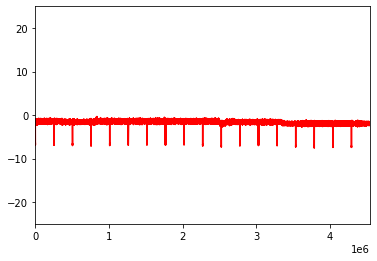

In [30]:
c = np.array(channels_data_frame.loc['Channel A', :])
print(b)
d = np.concatenate(c)
plt.plot(d, 'r')
plt.axis([0, len(d), -25, 25])
plt.show()

## 3 | Find Test Pulse and calculate Seal Resistance

__Protocols used:__

 - OP_VC_clear:
    - Sweep duration: 4950ms
    - Sweep interval: 50ms
    - Test pulse: 100ms (50ms delay and 50ms pulse)
    - Real data per sweep: 4850ms

 - OP_VC_clear_nointerval:
   - Sweep duration: 5100ms
   - Sweep interval: 0ms
   - Test pulse: 75ms (25ms delay and 50ms pulse)
   - Real data per sweep: 5025ms

 - OP_VC_clear_nointerval:
   - Sweep duration: 10100ms
   - Sweep interval: 0ms
   - Test pulse: 75ms (25ms delay and 50ms pulse)
   - Real data per sweep: 10025ms


### 3.1 | Using the derivative
Load one sweep from Output A to get the test pulse magnitude and the indices for start and end (could hardcode by using "strfind/strcmp" to determine test pulse times and size from the protocol name).

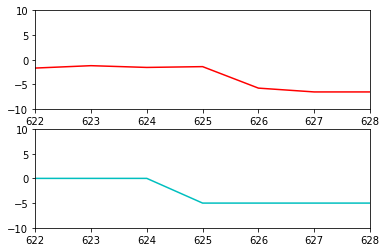

In [31]:
# Compare the output with the recorded data -> note there is a delay of one sampling point between both.
sweep_IA = np.array(channels_data_frame.at['Channel A', '7']) # compare peaks from output A and channel A
sweep_OA = np.array(channels_data_frame.at['Output A', '7']) # compare peaks from output A and channel A
plt.figure(1)
plt.subplot(211)
plt.plot(sweep_IA, 'r')
plt.axis([622, 628, -10, 10])
plt.subplot(212)
plt.plot(sweep_OA, 'c')
plt.axis([622, 628, -10, 10])
plt.show()

In [32]:
print(len(np.arange(len(sweep_IA))*dt))
print(len(sweep_IA))
print(len(np.arange(len(sweep_OA))*dt))
print(len(sweep_OA))

252500
252500
1875
1875


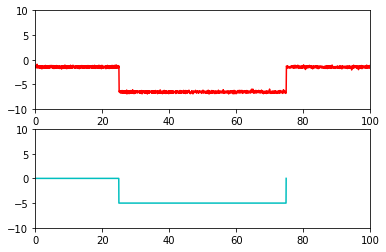

In [33]:
# Now plot the sweeps but converting sampling rate to miliseconds
sweep_IA = np.array(channels_data_frame.at['Channel A', '7'])
sweep_IB = np.array(channels_data_frame.at['Channel B', '7'])
sweep_OA = np.array(channels_data_frame.at['Output A', '7'])
real_time_IA = np.arange(len(sweep_IA))*dt
real_time_OA = np.arange(len(sweep_OA))*dt

plt.figure(1)
plt.subplot(211)
plt.plot(real_time_IA, sweep_IA, 'r')
plt.axis([0, 100, -10, 10])
plt.subplot(212)
plt.plot(real_time_OA, sweep_OA, 'c')
plt.axis([0, 100, -10, 10])
plt.show()

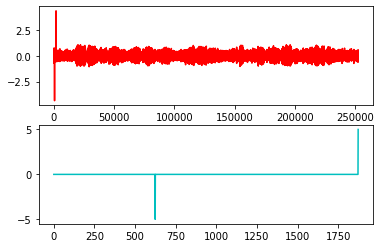

In [34]:
# Calculate and plot the derivative of both the Output A and Channel A
sweep_IA_diff = np.diff(sweep_IA)
sweep_OA_diff = np.diff(sweep_OA)
real_time_IA_diff = np.arange(len(sweep_IA_diff))*dt
real_time_OA_diff = np.arange(len(sweep_OA_diff))*dt

plt.figure(1)
plt.subplot(211)
plt.plot(sweep_IA_diff, 'r')
#plt.axis([0, 100, -10, 10])
plt.subplot(212)
plt.plot(sweep_OA_diff, 'c')
#plt.axis([0, 100, -10, 10])
plt.show()

# Output A is ideal to get the test pulse from the digital command

In [35]:
# Find the transitions - start and end of the test pulse in both the command and the recorded channel:
print(np.where(np.diff(sweep_IA) < (-2.5)))
print(np.where(np.diff(sweep_OA) < (-2.5)))
print(np.where(np.diff(sweep_IA) > (2.5)))
print(np.where(np.diff(sweep_OA) > (2.5)))

# Doing it from 0 only works from the command/ttl/output A
print(np.where(np.diff(sweep_IA) < (0)))
print(np.where(np.diff(sweep_OA) < (0)))
print(np.where(np.diff(sweep_IA) > (0)))
print(np.where(np.diff(sweep_OA) > (0)))

(array([625], dtype=int64),)
(array([624], dtype=int64),)
(array([1874], dtype=int64),)
(array([1873], dtype=int64),)
(array([     1,      3,      5, ..., 252493, 252495, 252498], dtype=int64),)
(array([624], dtype=int64),)
(array([     0,      2,      4, ..., 252494, 252496, 252497], dtype=int64),)
(array([1873], dtype=int64),)


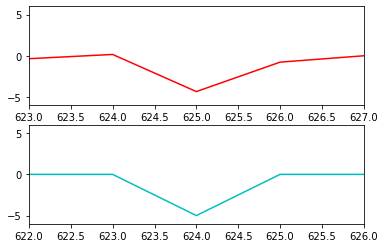

In [36]:
# Again, using the Output A is better to calculate the test_pulse command
plt.figure(1)
plt.subplot(211)
plt.plot(sweep_IA_diff, 'r')
plt.axis([623, 627, -6, 6])
plt.subplot(212)
plt.plot(sweep_OA_diff, 'c')
plt.axis([622, 626, -6, 6])
plt.show()

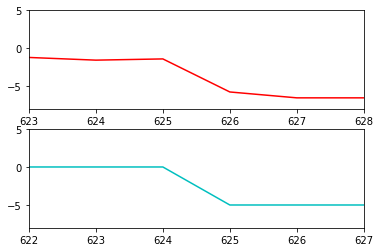

In [37]:
# Remember that by doing np.diff you have one less item in the array
plt.figure(1)
plt.subplot(211)
plt.plot(sweep_IA, 'r')
plt.axis([623, 628, -8, 5])
plt.subplot(212)
plt.plot(sweep_OA, 'c')
plt.axis([622, 627, -8, 5])
plt.show()

In [38]:
# Find the edges of the test_pulse
test_pulse_start = np.where(np.diff(sweep_OA) < (0))
test_pulse_end = np.where(np.diff(sweep_OA) > (0))
# Extract them from the tuple
test_pulse_start_i = test_pulse_start[0][0]
test_pulse_end_i = test_pulse_end[0][0]
print(test_pulse_start[0][0])
print(test_pulse_start_i)
print(test_pulse_end[0][0])
print(test_pulse_end_i)

624
624
1873
1873


In [39]:
# Use the indices of the test_pulse command to define baseline period and test period
sweep_OA_baseline = np.mean(sweep_OA[int(test_pulse_start_i - (20/0.04)):test_pulse_start_i])
sweep_OA_pulse = np.mean(sweep_OA[int(test_pulse_end_i - (49/0.04)):test_pulse_end_i])
test_pulse_command = sweep_OA_baseline - sweep_OA_pulse #mV
print(sweep_OA_baseline)
print(sweep_OA_pulse)
print(test_pulse_command)

0.0
-5.0
5.0


In [40]:
# Do the same as above but for the current channel
sweep_IB_baseline = np.mean(sweep_IB[int(test_pulse_start_i - (20/0.04)):test_pulse_start_i])
sweep_IB_pulse = np.mean(sweep_IB[int(test_pulse_end_i - (49/0.04)):test_pulse_end_i])
test_pulse_membrane = sweep_IB_baseline - sweep_IB_pulse #pA
print(sweep_IB_baseline)
print(sweep_IB_pulse)
print(test_pulse_membrane)

-10.563302404589788
-399.83279406776217
389.2694916631724


### 3.2 | Using the Output channel
Instead of doing the derivative, use the Output Channel to find all the indices where the test pulse is active (i.e. <0).
This will be computationally more efficient and will give you all the indices to average to find the seal resistance (as opposed to only the beginning and end of the test pulse).


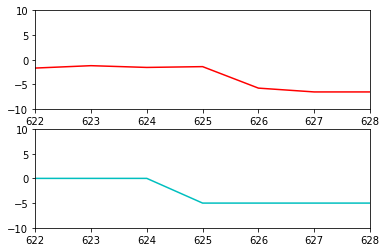

In [41]:
# Compare the output with the recorded data -> note there is a delay of one sampling point between both.
sweep_IA = np.array(channels_data_frame.at['Channel A', '7']) # compare peaks from output A and channel A
sweep_IB = np.array(channels_data_frame.at['Channel B', '7'])
sweep_OA = np.array(channels_data_frame.at['Output A', '7']) # compare peaks from output A and channel A
plt.figure(1)
plt.subplot(211)
plt.plot(sweep_IA, 'r')
plt.axis([622, 628, -10, 10])
plt.subplot(212)
plt.plot(sweep_OA, 'c')
plt.axis([622, 628, -10, 10])
plt.show()

In [42]:
# Instead of doing the derivative, use the Output Channel to find all the indices where the test pulse is active.
test_pulse = np.where(sweep_OA < 0)
test_pulse_output_indices = test_pulse[0]
print(test_pulse_output_indices)
len(test_pulse_output_indices)

[ 625  626  627 ... 1871 1872 1873]


1249

In [43]:
test_pulse_channel_indices = test_pulse_output_indices + 1
print(test_pulse_channel_indices)
len(test_pulse_output_indices)

[ 626  627  628 ... 1872 1873 1874]


1249

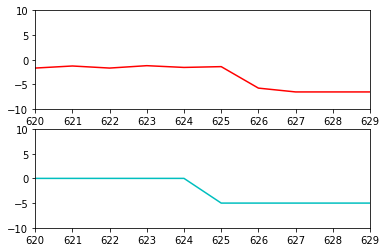

In [44]:
#Plot beginning of test pulse
plt.figure(1)
plt.subplot(211)
plt.plot(sweep_IA, 'r')
plt.axis([test_pulse_output_indices[0]-5, test_pulse_output_indices[4], -10, 10])
plt.subplot(212)
plt.plot(sweep_OA, 'c')
plt.axis([test_pulse_output_indices[0]-5, test_pulse_output_indices[4], -10, 10])
plt.show()

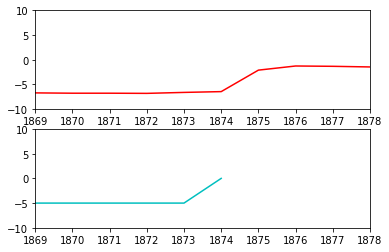

In [45]:
#Plot end of test pulse
plt.figure(1)
plt.subplot(211)
plt.plot(sweep_IA, 'r')
plt.axis([test_pulse_output_indices[-5], test_pulse_output_indices[-1]+5, -10, 10])
plt.subplot(212)
plt.plot(sweep_OA, 'c')
plt.axis([test_pulse_output_indices[-5], test_pulse_output_indices[-1]+5, -10, 10])
plt.show()

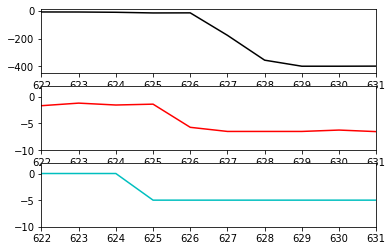

In [46]:
# Note how there is a further delay for the channel B
plt.figure(1)
plt.subplot(311)
plt.plot(sweep_IB, 'k')
plt.axis([test_pulse_output_indices[0]-3, test_pulse_output_indices[6], -450, 10])
plt.subplot(312)
plt.plot(sweep_IA, 'r')
plt.axis([test_pulse_output_indices[0]-3, test_pulse_output_indices[6], -10, 2])
plt.subplot(313)
plt.plot(sweep_OA, 'c')
plt.axis([test_pulse_output_indices[0]-3, test_pulse_output_indices[6], -10, 2])
plt.show()

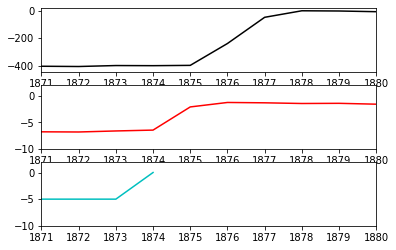

In [47]:
# Note how there is a further delay for the channel B
plt.figure(1)
plt.subplot(311)
plt.plot(sweep_IB, 'k')
plt.axis([test_pulse_output_indices[-3], test_pulse_output_indices[-1]+7, -450, 20])
plt.subplot(312)
plt.plot(sweep_IA, 'r')
plt.axis([test_pulse_output_indices[-3], test_pulse_output_indices[-1]+7, -10, 2])
plt.subplot(313)
plt.plot(sweep_OA, 'c')
plt.axis([test_pulse_output_indices[-3], test_pulse_output_indices[-1]+7, -10, 2])
plt.show()

### 3.3 | Use the indices to get the test pulse magnitude



In [48]:
sweep_IA = np.array(channels_data_frame.at['Channel A', '7'])
sweep_IB = np.array(channels_data_frame.at['Channel B', '7'])
sweep_OA = np.array(channels_data_frame.at['Output A', '7'])
print('done!')

done!


In [49]:
test_pulse = np.where(sweep_OA < 0)
test_pulse_OA_indices = test_pulse[0]
print(test_pulse_OA_indices)

[ 625  626  627 ... 1871 1872 1873]


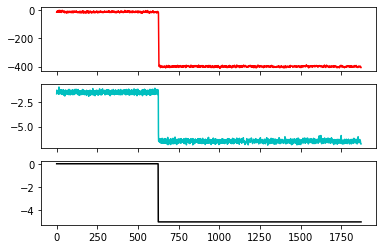

In [50]:
fig, axs = plt.subplots (3, sharex=True)
axs[0].plot(sweep_IB[:test_pulse_OA_indices[-1]], 'r')
axs[1].plot(sweep_IA[:test_pulse_OA_indices[-1]], 'c')
axs[2].plot(sweep_OA[:test_pulse_OA_indices[-1]], 'k')
plt.show()

In [51]:
# Use the indices of the test_pulse command to define baseline period and test period
sweep_OA_baseline = np.mean(sweep_OA[:(test_pulse_OA_indices[0]-1)]) # Subtract 1 to stop baseline before command starts
sweep_OA_pulse = np.mean(sweep_OA[test_pulse_OA_indices])
test_pulse_command = sweep_OA_baseline - sweep_OA_pulse # mV
print(sweep_OA_baseline)
print(sweep_OA_pulse)
print(test_pulse_command)

0.0
-5.0
5.0


### 3.4 | Average baseline and pulse in the current channel

In [52]:
# Use the test_pulse indices to get the baseline and cell response to calculate the seal resistance

# To be exact and account for the delays between digital command and output from the amplifier, you could add +1 to the first index to calculate the baseline.
sweep_IB_baseline = np.mean(sweep_IB[:(test_pulse_OA_indices[0])])
# Similary, to avoid using the values recorded while the test pulse command begins, you can skip a milisecond (+4 indices) to the beginning, to ensure you start averaging once the signal has reached the cell. To be extra exact, you could add +2 to the last index so you use all the samples. However, this shouldn't make a difference, so we just skip the milisecond to avoid the transition period.
sweep_IB_pulse = np.mean(sweep_IB[(test_pulse_OA_indices[0]+4):(test_pulse_OA_indices[-1])])
test_pulse_membrane = sweep_IB_baseline - sweep_IB_pulse # pA
print(sweep_IB_baseline)
print(sweep_IB_pulse)
print(test_pulse_membrane)

-10.36740162143913
-399.8139839184452
389.4465822970061


### 3.5 | Get the seal resistance in MOhm

In [53]:
# get seal resistance = mV/pA
seal_resistance = (test_pulse_command / test_pulse_membrane) * 1000 # to get MOhm
print(seal_resistance)

12.838731233714663


### 3.6 | Use the function to calculate seal resistance across sweeps

In [54]:
a = [sweep for sweep in channels_data_frame.columns]
print(a)

['7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24']


In [55]:
seal_resistance = []
trial_keys = list(channels_data_frame.columns.values)
cell_name = [file_name.split('.')[0]]
trial_keys = []

for sweep in channels_data_frame.columns:
    
    sweep_IA = np.array(channels_data_frame.at['Channel A', sweep])
    sweep_IB = np.array(channels_data_frame.at['Channel B', sweep])
    sweep_OA = np.array(channels_data_frame.at['Output A', sweep])

    # Get the indices of the test_pulse using the Output Channel
    test_pulse = np.where(sweep_OA < 0)
    test_pulse_OA_indices = test_pulse[0]

    # # Find the edges of the test_pulse
    # test_pulse_start = np.where(np.diff(sweep_OA) < (0))
    # test_pulse_end = np.where(np.diff(sweep_OA) > (0))
    # # Extract them from the tuple
    # test_pulse_start_i = test_pulse_start[0][0]
    # test_pulse_end_i = test_pulse_end[0][0]

    # Use the indices of the test_pulse command to define baseline period and test period
    sweep_OA_baseline = np.mean(sweep_OA[:(test_pulse_OA_indices[0]-1)]) # -1 to stop baseline before command starts
    sweep_OA_pulse = np.mean(sweep_OA[test_pulse_OA_indices])
    test_pulse_command = sweep_OA_baseline - sweep_OA_pulse # mV

    # # Use the indices of the test_pulse command to define baseline period and test period
    # sweep_OA_baseline = np.mean(sweep_OA[int(test_pulse_start_i - (20/0.04)):test_pulse_start_i])
    # sweep_OA_pulse = np.mean(sweep_OA[int(test_pulse_end_i - (49/0.04)):test_pulse_end_i])
    # test_pulse_command = sweep_OA_baseline - sweep_OA_pulse #mV


    # Use the test_pulse indices to get the baseline and cell response to calculate the seal resistance
    # To be exact and account for the delays between digital command and output from the amplifier, you could add +1 to the first index to calculate the baseline.
    sweep_IB_baseline = np.mean(sweep_IB[:(test_pulse_OA_indices[0])])
    # Similary, to avoid using the values recorded while the test pulse command begins, you can skip a milisecond (+4 indices) to the beginning, to ensure you start averaging once the signal has reached the cell. To be extra exact, you could add +2 to the last index so you use all the samples. However, this shouldn't make a difference, so we just skip the milisecond to avoid the transition period.
    sweep_IB_pulse = np.mean(sweep_IB[(test_pulse_OA_indices[0]+4):(test_pulse_OA_indices[-1])])
    test_pulse_membrane = sweep_IB_baseline - sweep_IB_pulse # pA

    # # Do the same as above but for the Current channel
    # sweep_IB_baseline = np.mean(sweep_IB[int(test_pulse_start_i - (20/0.04)):test_pulse_start_i])
    # sweep_IB_pulse = np.mean(sweep_IB[int(test_pulse_end_i - (49/0.04)):test_pulse_end_i])
    # test_pulse_membrane = sweep_IB_baseline - sweep_IB_pulse #pA

    # get seal resistance = mV/pA
    Rseal = (test_pulse_command / test_pulse_membrane) * 1000 # to get MOhm
    
    # append results
    seal_resistance.append(Rseal)
    trial_keys.append(sweep)

print(trial_keys)
print(cell_name)
print(seal_resistance)
print(np.mean(seal_resistance))

12.838731233714663
13.123893628186472
13.126667669725904
13.095672217127463
13.263421129232647
13.60704783957095
13.780832586376215
13.839920364186504
14.003868461809661
14.17639968582648
14.318672044693228
14.449722216125638
14.686708917042
14.863130693901612
14.83478441991517
14.903527165588098
14.616625352226015
14.629611536610375
['7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24']
['dlpag_vgat_201201_c5_LDIBX_OP_VC_clear_nointerval_1']
[12.838731233714663, 13.123893628186472, 13.126667669725904, 13.095672217127463, 13.263421129232647, 13.60704783957095, 13.780832586376215, 13.839920364186504, 14.003868461809661, 14.17639968582648, 14.318672044693228, 14.449722216125638, 14.686708917042, 14.863130693901612, 14.83478441991517, 14.903527165588098, 14.616625352226015, 14.629611536610375]
14.008846508992171


In [56]:
pd.DataFrame([seal_resistance], columns = trial_keys, index = cell_name)
# you need to put the list of the seal_resistance values into another list, otherwise pandas can't build the dataframe properly.

,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
dlpag_vgat_201201_c5_LDIBX_OP_VC_clear_nointerval_1,12.838731,13.123894,13.126668,13.095672,13.263421,13.607048,13.780833,13.83992,14.003868,14.1764,14.318672,14.449722,14.686709,14.863131,14.834784,14.903527,14.616625,14.629612


### 3.7 | Plot both the seal resistance across time and the average for the cell

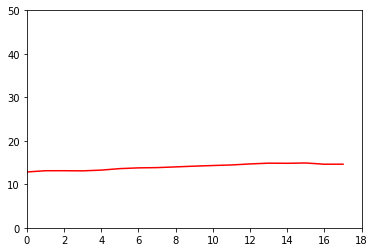

In [57]:
plt.figure(1)
plt.plot(seal_resistance, 'r')
plt.axis([0, len(seal_resistance), 0, 50])

plt.show()

### 3.8 | Put it into a function 

In [58]:
def getLooseRseal(
    file_name,
    channels_data_frame,
    dt):
    """
    `getLooseRseal` calculates the seal resistance (Rseal) from the test pulse size and the cell's response.
    Takes a data frame and returns both the Rseal average and its value across time of recording.
    
    :file_name: contains useful metadata (PAG subdivision, cell type, date, cell ID, protocol name).
    :extracted_channels_data_frame: data frame with extracted data from a loose-seal recording (e.g. gap-free protocol with a short test pulse in the beginning).
    :dt: delta time obtained by dividing 1 over sampling rate.
    """

    cell_name = [file_name.split('.')[0]] # Get the file name without the extension
    print(cell_name)
    seal_resistance = []
    trial_keys = []

    for sweep in channels_data_frame.columns:
        
        sweep_IA = np.array(channels_data_frame.at['Channel A', sweep])
        sweep_IB = np.array(channels_data_frame.at['Channel B', sweep])
        sweep_OA = np.array(channels_data_frame.at['Output A', sweep])

        # Get the indices of the test_pulse using the Output Channel
        test_pulse = np.where(sweep_OA < 0)
        test_pulse_OA_indices = test_pulse[0]

        # # Find the edges of the test_pulse
        # test_pulse_start = np.where(np.diff(sweep_OA) < (0))
        # test_pulse_end = np.where(np.diff(sweep_OA) > (0))
        # # Extract them from the tuple
        # test_pulse_start_i = test_pulse_start[0][0]
        # test_pulse_end_i = test_pulse_end[0][0]

        # Use the indices of the test_pulse command to define baseline period and test period
        sweep_OA_baseline = np.mean(sweep_OA[:(test_pulse_OA_indices[0]-1)]) # -1 to stop baseline before command starts
        sweep_OA_pulse = np.mean(sweep_OA[test_pulse_OA_indices])
        test_pulse_command = sweep_OA_baseline - sweep_OA_pulse # mV

        # # Use the indices of the test_pulse command to define baseline period and test period
        # sweep_OA_baseline = np.mean(sweep_OA[int(test_pulse_start_i - (20/0.04)):test_pulse_start_i])
        # sweep_OA_pulse = np.mean(sweep_OA[int(test_pulse_end_i - (49/0.04)):test_pulse_end_i])
        # test_pulse_command = sweep_OA_baseline - sweep_OA_pulse #mV


        # Use the test_pulse indices to get the baseline and cell response to calculate the seal resistance
        # To be exact and account for the delays between digital command and output from the amplifier, you could add +1 to the first index to calculate the baseline.
        sweep_IB_baseline = np.mean(sweep_IB[:(test_pulse_OA_indices[0])])
        # Similary, to avoid using the values recorded while the test pulse command begins, you can skip a milisecond (+4 indices) to the beginning, to ensure you start averaging once the signal has reached the cell. To be extra exact, you could add +2 to the last index so you use all the samples. However, this shouldn't make a difference, so we just skip the milisecond to avoid the transition period.
        sweep_IB_pulse = np.mean(sweep_IB[(test_pulse_OA_indices[0]+4):(test_pulse_OA_indices[-1])])
        test_pulse_membrane = sweep_IB_baseline - sweep_IB_pulse # pA

        # # Do the same as above but for the Current channel
        # sweep_IB_baseline = np.mean(sweep_IB[int(test_pulse_start_i - (20/0.04)):test_pulse_start_i])
        # sweep_IB_pulse = np.mean(sweep_IB[int(test_pulse_end_i - (49/0.04)):test_pulse_end_i])
        # test_pulse_membrane = sweep_IB_baseline - sweep_IB_pulse #pA

        # Get seal resistance = mV/pA
        Rseal = (test_pulse_command / test_pulse_membrane) * 1000 # to get MOhm
        
        # append results
        seal_resistance.append(Rseal)
        trial_keys.append(sweep)

    # Create data frame of data:
    extracted_Rseal_data_frame = pd.DataFrame([seal_resistance], index = cell_name, columns = trial_keys)

    return extracted_Rseal_data_frame

#### 3.8.1 | Test function

In [59]:
print(file_name)
print(dt)
channels_data_frame

dlpag_vgat_201201_c5_LDIBX_OP_VC_clear_nointerval_1.hdf5
0.04


,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
Channel A,"[-1.6124128324134814, -1.2260207615682315, -1....","[-1.5480141542486916, -1.4192167975478727, -1....","[-1.7412101883719264, -1.4836154759601623, -1....","[-1.5158148151198958, -1.5158148151198958, -1....","[-1.3870174582953112, -1.6124128324134814, -1....","[-1.258220100975559, -1.4514161367694889, -1.3...","[-1.3870174582953112, -1.5480141542486916, -1....","[-1.2260207615682315, -1.5480141542486916, -1....","[-1.5480141542486916, -1.5480141542486916, -1....","[-1.7412101883719264, -1.7412101883719264, -1....","[-2.1276022532796945, -1.870007543835665, -2.1...","[-1.4514161367694889, -1.5480141542486916, -1....","[-1.5480141542486916, -1.5480141542486916, -1....","[-1.6768115104545525, -1.5802134933465526, -1....","[-1.8056088661656235, -1.9666055601089187, -1....","[-2.0954029147073254, -1.9022068826243217, -1....","[-1.9022068826243217, -1.9022068826243217, -1....","[-1.9022068826243217, -1.934406221382072, -1.9..."
Channel B,"[-11.616220826606902, -7.752300066135383, -8.7...","[9.635343909020817, 5.771422947326991, 11.8892...","[0.29753499493087243, -0.6684452226398963, 1.9...","[-20.632035761040658, -17.734095272842332, -22...","[-11.938214221299425, -13.870174582953112, -14...","[-7.752300066135383, -8.718280260436195, -9.68...","[-4.532366064980151, -0.6684452226398963, -5.8...","[5.449429535875142, 6.737403183549116, -0.3464...","[-3.2443924558328088, -4.210372663158741, -0.9...","[8.669363664395322, 4.805442713904577, 0.61952...","[-24.817949755377462, -25.13994313739636, -29....","[-10.97223403629284, -17.734095272842332, -15....","[-10.00625384849881, -8.074293464545597, -10.0...","[6.093416359089918, 6.737403183549116, 6.09341...","[-2.922399052770176, -0.3464518170935623, -2.2...","[-12.58220100975559, -10.650240640671248, -12....","[-12.260207615682315, -11.294227431604716, -14...","[-3.2443924558328088, 0.619528401409027, -1.95..."
Output A,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
Output B,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [60]:
Rseal_data_frame = getLooseRseal(file_name, channels_data_frame, dt)
Rseal_data_frame

['dlpag_vgat_201201_c5_LDIBX_OP_VC_clear_nointerval_1']


,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
dlpag_vgat_201201_c5_LDIBX_OP_VC_clear_nointerval_1,12.838731,13.123894,13.126668,13.095672,13.263421,13.607048,13.780833,13.83992,14.003868,14.1764,14.318672,14.449722,14.686709,14.863131,14.834784,14.903527,14.616625,14.629612


In [61]:
np.mean(Rseal_data_frame.iloc[0,:])

14.008846508992171